In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# view the iris dataset with seaborn
import seaborn as sns

data_df = sns.load_dataset('penguins')

def sex_to_num(x):
  if x == 'Male':
    return 0
  elif x == 'Female':
    return 1
  else:
    return 0.5

data_df['sex'] = data_df['sex'].apply(sex_to_num)

X = data_df.drop(['species', 'island'], axis=1)
y = data_df['species']

In [ ]:
# view the iris dataset with seaborn
import seaborn as sns

data_df = sns.load_dataset('iris')
X = data_df.drop('species', axis=1)
y = data_df['species']
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 1200x800 with 0 Axes>

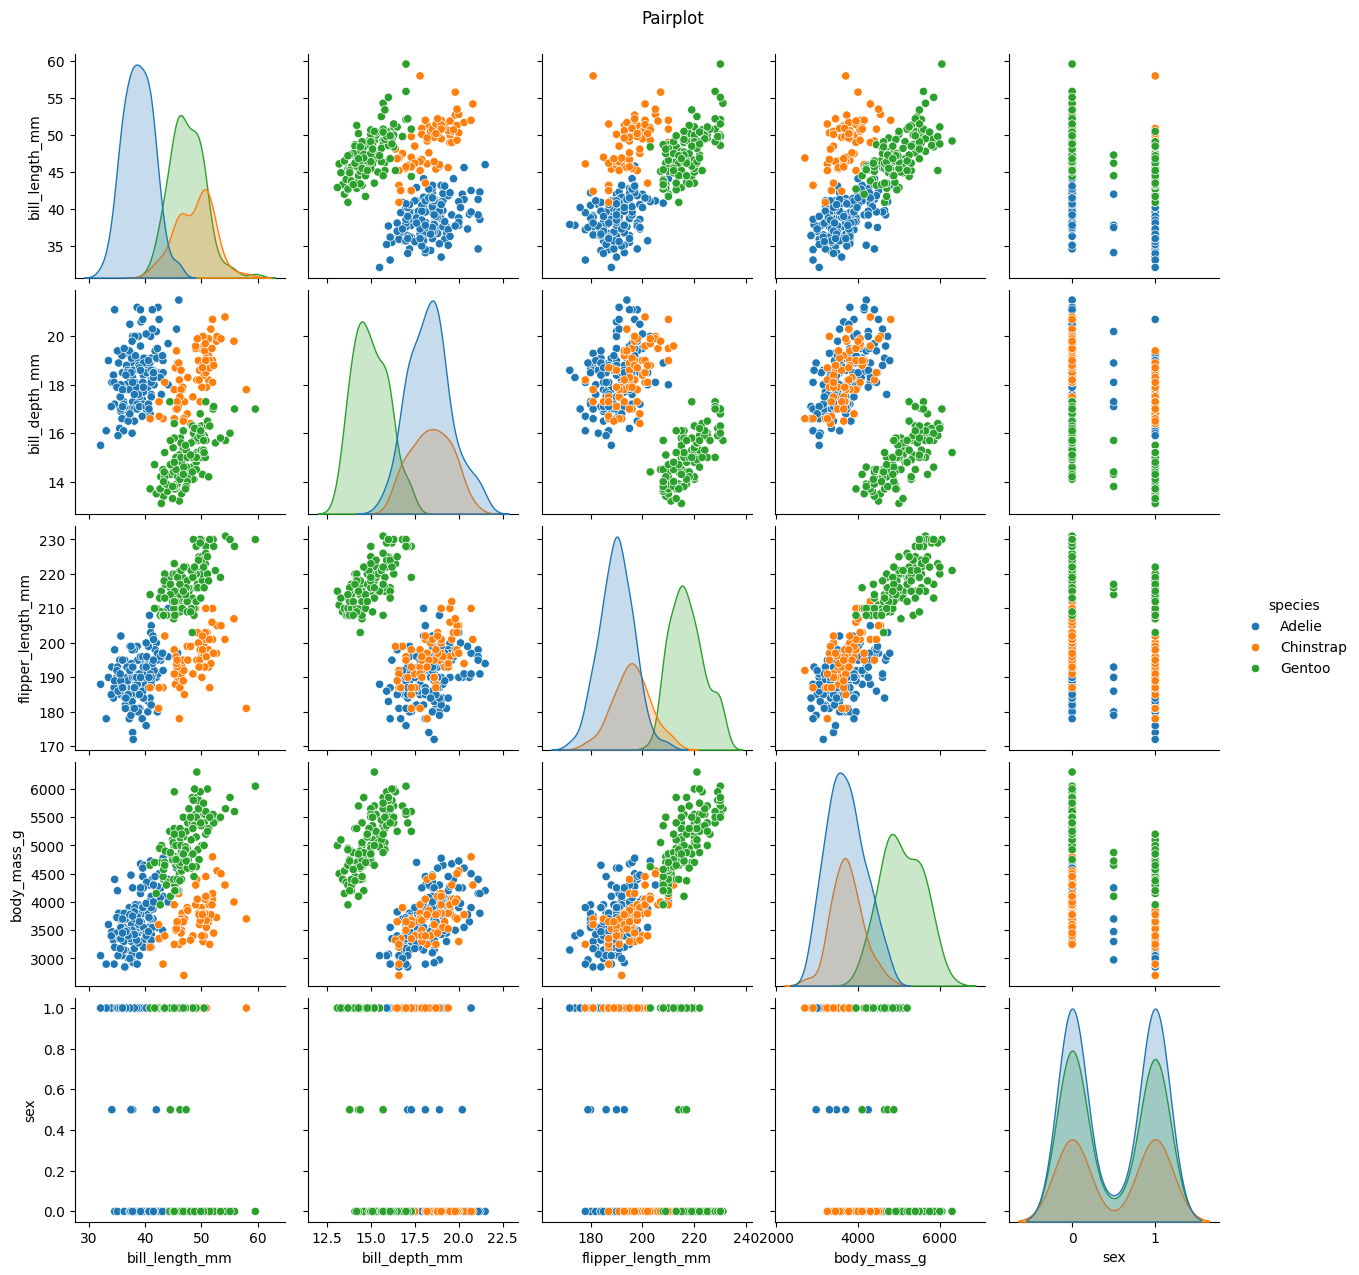

In [ ]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(data_df, hue='species')
plt.suptitle('Pairplot', y=1.02)
plt.show()

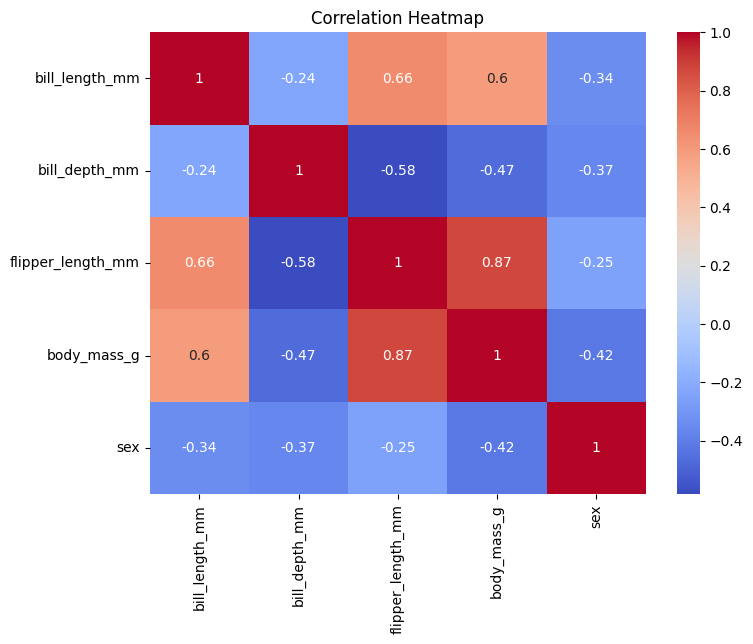

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_df.drop(['species', 'island'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# GridSearch

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')
penguins['sex'] = penguins['sex'].apply(sex_to_num)
penguins.fillna(0, inplace=True)

# Prepare data for training
X = penguins.drop(['species', 'island'], axis = 1)#iris.drop('species', axis=1)
y = penguins['species']#iris['species']

# Encode the labels (species) as numbers for classification
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and hyperparameters
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier()
}

param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    }
}

# Custom scorer: Gini coefficient from ROC AUC
def gini_score(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
    return 2 * auc - 1

gini_scorer = make_scorer(gini_score, needs_proba=True)

# Store best models and Gini scores
best_models = {}
gini_scores = {}

# Iterate over models and perform GridSearchCV
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    grid = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring=gini_scorer, cv=5)
    grid.fit(X_train, y_train)

    # Best model and Gini score
    best_model = grid.best_estimator_
    best_models[model_name] = best_model

    # Predict on the test set
    y_pred = best_model.predict_proba(X_test)
    gini = gini_score(y_test, y_pred)
    gini_scores[model_name] = gini

    print(f"Best {model_name} parameters: {grid.best_params_}")
    print(f"Gini Score: {gini:.4f}")

# Final Gini scores for comparison
print("\nFinal Gini Scores for Each Model:")
for model_name, gini in gini_scores.items():
    print(f"{model_name}: Gini = {gini:.4f}")



Training RandomForest...
Best RandomForest parameters: {'max_depth': 20, 'n_estimators': 50}
Gini Score: 0.9963

Training SVM...
Best SVM parameters: {'C': 10, 'kernel': 'linear'}
Gini Score: 0.9998

Training LogisticRegression...
Best LogisticRegression parameters: {'C': 10}
Gini Score: 0.9965

Training KNN...
Best KNN parameters: {'n_neighbors': 3}
Gini Score: 0.7234

Final Gini Scores for Each Model:
RandomForest: Gini = 0.9963
SVM: Gini = 0.9998
LogisticRegression: Gini = 0.9965
KNN: Gini = 0.7234


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

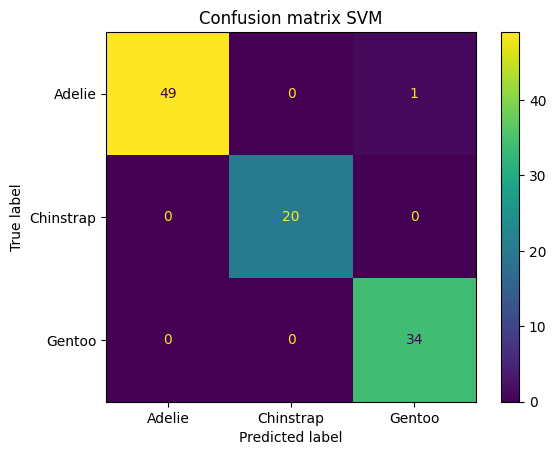

In [ ]:
# Seleccionamos el mejor modelo
best_model = best_models['SVM']
predictions = best_model.predict(X_test)
class_names = le.classes_

# Graficamos matriz de confusion
cm = confusion_matrix(y_test, predictions, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.title('Confusion matrix SVM')
plt.show()

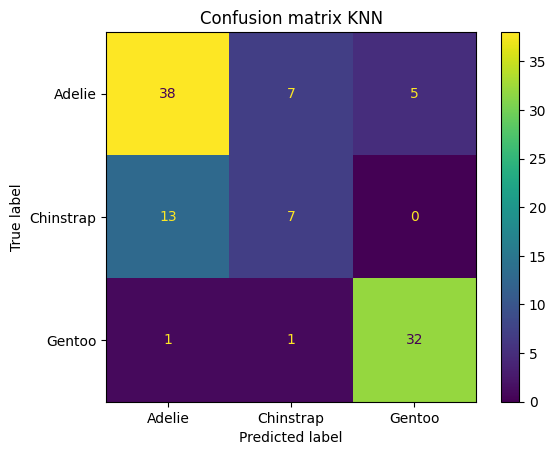

In [ ]:
# Seleccionamos el peor modelo
worst_model = best_models['KNN']
predictions_w = worst_model.predict(X_test)
class_names = le.classes_

# Graficamos matriz de confusion
cm = confusion_matrix(y_test, predictions_w, labels=worst_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()
plt.title('Confusion matrix KNN')
plt.show()

# Optuna

In [ ]:
!pip install optuna -q

In [ ]:
import optuna
import numpy as np


def objective(trial):

    le = LabelEncoder()

    # Load dataset
    penguins = sns.load_dataset('penguins')
    penguins['sex'] = le.fit_transform(penguins['sex'])
    penguins.fillna(0, inplace=True)
    X, y = penguins.drop(['species', 'island'], axis=1), penguins['species']
    y = le.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Suggest hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    # Train and evaluate model
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    return score

In [ ]:
# Create a study object
study = optuna.create_study(direction="minimize")

# Optimize the objective function
study.optimize(objective, n_trials=200)

[I 2024-09-24 04:59:50,961] A new study created in memory with name: no-name-7d8fb582-76f8-4383-94dd-24a8267cce38
[I 2024-09-24 04:59:50,997] Trial 0 finished with value: 0.7307692307692307 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.7307692307692307.
[I 2024-09-24 04:59:51,026] Trial 1 finished with value: 0.7403846153846154 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.7307692307692307.
[I 2024-09-24 04:59:51,054] Trial 2 finished with value: 0.75 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.7307692307692307.
[I 2024-09-24 04:59:51,081] Trial 3 finished with value: 0.75 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 0.7307692307692307.
[I 2024-09-24 04:59:51,111] Trial 4 finished with value: 0.7403846153846154 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.7307692307692307.
[I 2024-09-24 04:59:51,142] Trial 5 finished with value: 0.7596153846153846 and parameters: {'n_neighbors': 10

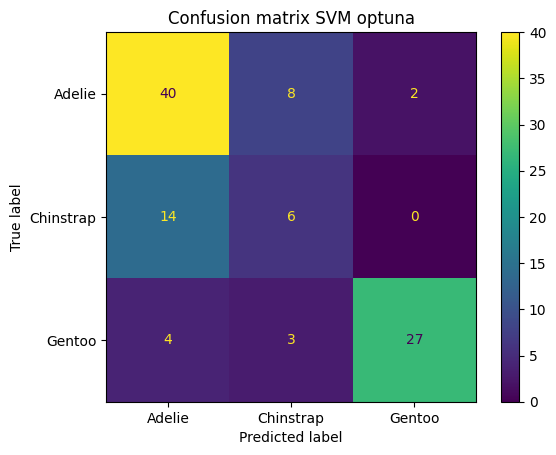

In [ ]:
best_model_knn = KNeighborsClassifier(n_neighbors=study.best_params['n_neighbors'])
best_model_knn.fit(X_train, y_train)
y_pred_knn = best_model_knn.predict(X_test)
class_names_knn = le.classes_

# Graficamos matriz de confusion
cm = confusion_matrix(y_test, y_pred_knn, labels=best_model_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names_knn)
disp.plot()
plt.title('Confusion matrix SVM optuna')
plt.show()